In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]

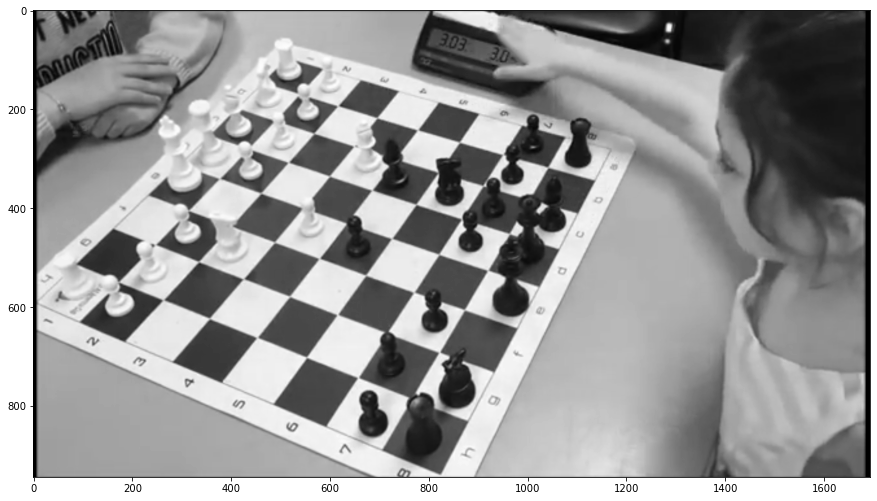

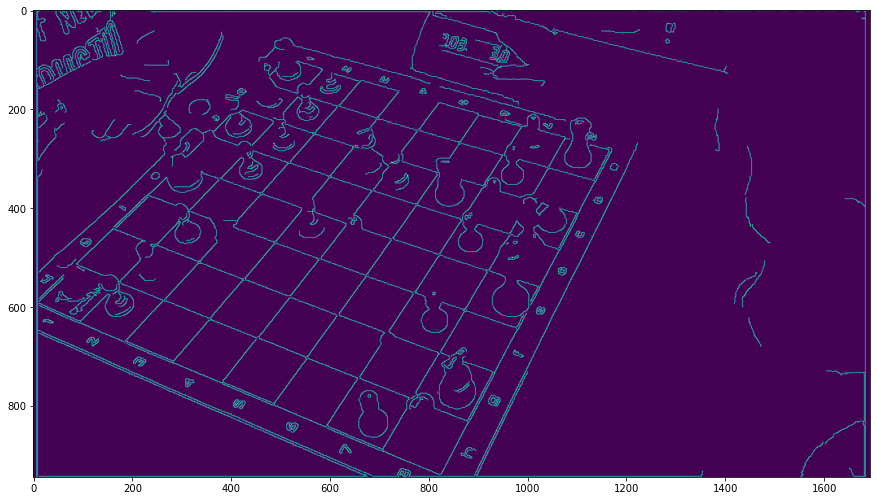

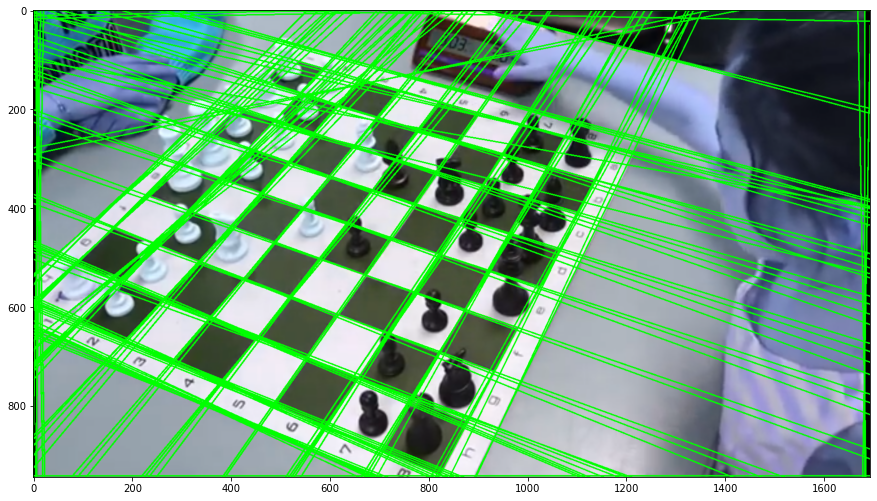

In [51]:
def cut_to_relevant_time(path:str)->None:
    """
    this function takes raw video file and cuts it to
    relevant frames of chess game and writes
    :param path:
    :return:
    """
    pass

def keep_frames_for_analysis(path:str)->None:
    """
    this function takes the video file and keeps images with 81
    intersections of lines
    :param path:
    :return:
    """
    pass

def analize_first_frame (image)->dict:
    """
    this function takes a single frame and separates it into squares,
    returns a dictionary of pieces by location
    :param image:
    :return:
    """
    pass

def find_81_point(image)->dict:
    """

    :param image:
    :return:{'a1':((x,y),(x,y),(x,y),(x,y)),'h8':((x,y),(x,y),(x,y),(x,y))}
    """
    image = cv2.imread(image)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image,cmap='gray')
    plt.show()
    edges = cv2.Canny(gray_image,30,150,apertureSize = 3)
    plt.imshow(edges)
    plt.show()
    lines = cv2.HoughLines(edges,2,np.deg2rad(1),200)
    lines = lines.reshape(-1,2)
    for rho,theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        big_int_for_plot = 10_000
        x1 = int(x0 + big_int_for_plot*(-b))
        y1 = int(y0 + big_int_for_plot*(a))
        x2 = int(x0 - big_int_for_plot*(-b))
        y2 = int(y0 - big_int_for_plot*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

    cv2.imwrite('lines.jpg',image)
    plt.imshow(image)
    return lines

def find_top_2_changes(image1,coord1:dict,image2,coord2:dict)->tuple:
    """
    this function returns the bord locations that changed - from result[0]
    to result[1]
    :param image1:
    :param coord1:
    :param image2:
    :param coord2:
    :return:
    """
    pass

lines = find_81_point('data/sample.png')

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 2., 0., 1., 3., 0., 2., 2., 0., 3.,
        3., 0., 1., 1., 0., 5., 2., 0., 3., 2., 0., 6., 3., 0., 5., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 3., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 3., 5., 4., 3., 4., 4., 5., 3., 8., 6., 5., 0., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33, 

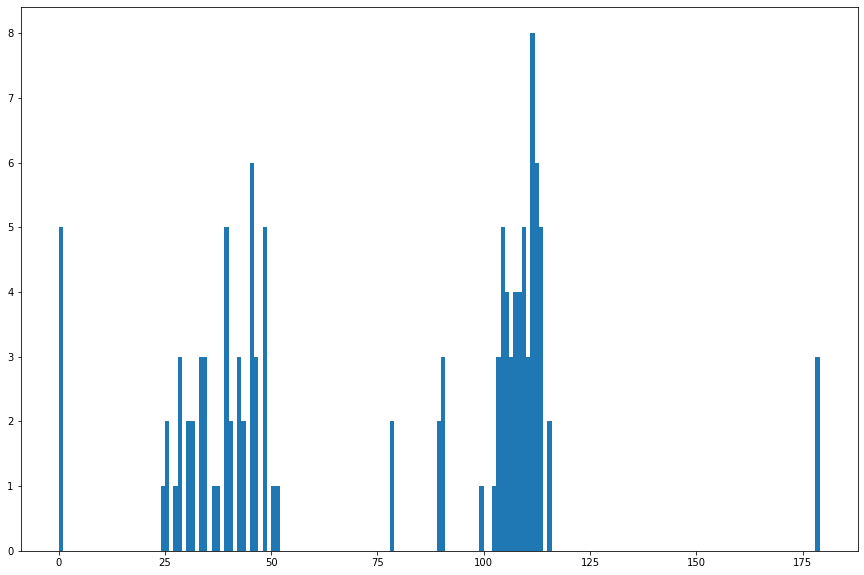

In [53]:
plt.hist(np.rad2deg(lines[:,1]),bins=np.arange(0,180,1))